# 万能RGB颜色生成

同济子豪兄 2024-9-7

## 导入工具包

In [1]:
import openvino_genai as ov_genai

## 载入OpenVINO IR格式的大模型

In [20]:
# device = 'CPU'
device = 'GPU'
# device = 'NPU'

In [2]:
pipe = ov_genai.LLMPipeline("Qwen2-7B-Instruct-int4-ov", device)

## 函数：生成RGB颜色

In [3]:
robot_order_template = '''
我即将说的这句话中包含一个目标物体，帮我把这个物体的一种可能的颜色，以0-255的RGB像素值形式返回给我，整理成元组格式，例如(255, 30, 60)
直接回复元组本身，以括号开头，不要回复任何中文内容
下面是这句话：
{}
'''

In [4]:
def chat_rgb(question="把灯的颜色调成玫瑰花的颜色"):
    prompt_human = robot_order_template.format(question)
    prompt_machine = "<|im_start|>system\n<|im_end|>\n<|im_start|>user\n{}<|im_end|>\n<|im_start|>assistant\n".format(prompt_human)
    result = pipe.generate(prompt_machine)
    rgb_color = eval(result.texts[0])
    return rgb_color

## 测试1

In [5]:
rgb_color = chat_rgb()

In [6]:
rgb_color

(255, 192, 203)

## 展示颜色

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def show_rgb(rgb_color=(255, 192, 203)):
    img_show = np.zeros((10, 10, 3), dtype=np.uint8) # 创建一个全黑的图像
    img_show[:] = rgb_color # 将图像所有像素设置为输入的RGB颜色
    plt.imshow(img_show)
    plt.show()

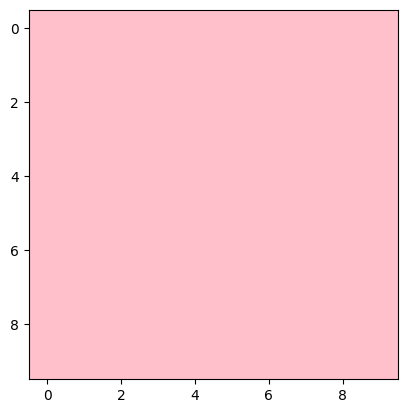

In [18]:
show_rgb()

## 测试2

In [9]:
rgb_color = chat_rgb('我想要竹子的颜色')

In [10]:
rgb_color

(0, 128, 0)

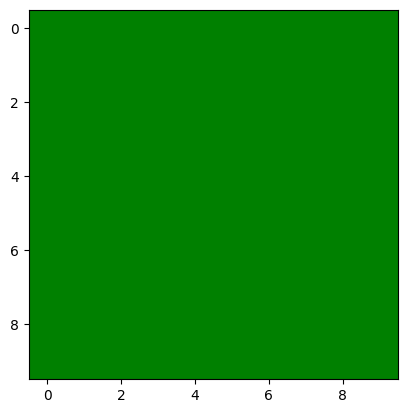

In [11]:
show_rgb(rgb_color)

## 测试3

In [13]:
rgb_color = chat_rgb('我想要贝加尔湖的颜色')

In [14]:
rgb_color

(129, 171, 202)

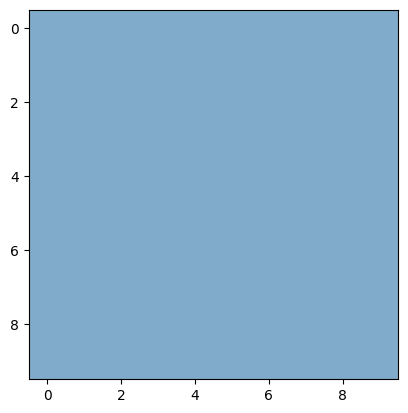

In [15]:
show_rgb(rgb_color)

## 测试4

In [16]:
rgb_color = chat_rgb('我想要黄金的颜色')

In [17]:
rgb_color

(255, 215, 0)

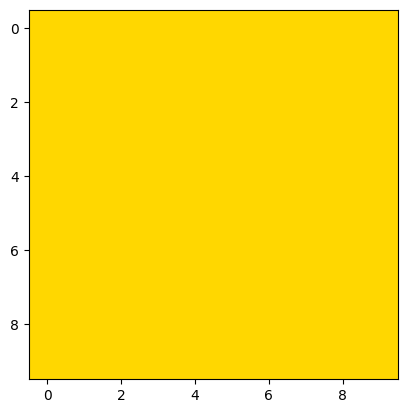

In [34]:
show_rgb(rgb_color)

## 测试5

In [18]:
rgb_color = chat_rgb('我想要OpenVINO标志的那种紫色')

In [42]:
rgb_color

(128, 0, 255)

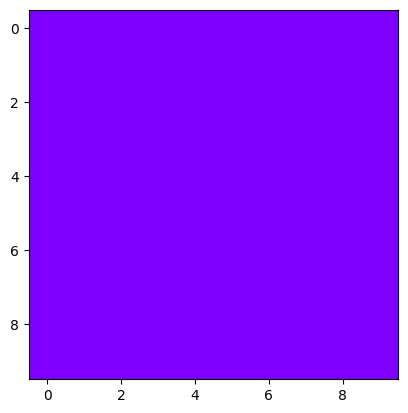

In [43]:
show_rgb(rgb_color)